In [594]:
import numpy
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [589]:
# Use a função read_csv() para ler o arquivo CSV
ds = pd.read_csv('dados/dataset.csv')

In [590]:
con = sqlite3.connect("dados/dataset.db") #arquivo precisa estar na mesma pasta do jupyter notebook

## Análise Exploratória

In [353]:
# Colunas do conjunto de dados
ds.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [354]:
# Verificando o tipo de dado de cada coluna
ds.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [355]:
# Resumo estatístico da coluna com o valor de venda
ds['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [356]:
# Verificando se há registros duplicados
ds[ds.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [357]:
# Verificando de há valores ausentes
ds.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Pergunta de Negócio 1:

#### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [358]:

# Abre um cursor para percorrer os dados no banco de dados
cursor = con.cursor()

In [359]:
query = """ SELECT Cidade, SUM(Valor_Venda) AS Total_Vendas
FROM vendas
WHERE Categoria = 'Office Supplies'
GROUP BY Cidade
ORDER BY Total_Vendas DESC 
LIMIT 1;
"""

In [360]:
cursor.execute (query)

In [361]:
resultado =  cursor.fetchone()

In [362]:
#Recupera os resultados da consulta


print("Cidade com maior valor médio de venda de 'Office Supplies':",resultado,  cursor.fetchall())


Cidade com maior valor médio de venda de 'Office Supplies': ('New York City', 68362.81399999995) []


### Pergunta de Negócio 2:
Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [363]:

# Abre um cursor para percorrer os dados no banco de dados
cursor = con.cursor()

In [364]:
query1 = """
    SELECT Data_Pedido, SUM(Valor_Venda) AS Total_Vendas
FROM vendas
GROUP BY Data_Pedido;
"""

In [365]:
cursor.execute(query1)

In [366]:
resultado =  cursor.fetchone()

In [367]:
 for row in cursor.fetchall():
    Data_Pedido, Total_Vendas = row
    print(f"Data: {Data_Pedido}, Total de Vendas: {Data_Pedido}")
    


Data: 01/02/2015, Total de Vendas: 01/02/2015
Data: 01/02/2017, Total de Vendas: 01/02/2017
Data: 01/03/2015, Total de Vendas: 01/03/2015
Data: 01/03/2016, Total de Vendas: 01/03/2016
Data: 01/03/2017, Total de Vendas: 01/03/2017
Data: 01/04/2015, Total de Vendas: 01/04/2015
Data: 01/04/2017, Total de Vendas: 01/04/2017
Data: 01/04/2018, Total de Vendas: 01/04/2018
Data: 01/05/2016, Total de Vendas: 01/05/2016
Data: 01/05/2017, Total de Vendas: 01/05/2017
Data: 01/05/2018, Total de Vendas: 01/05/2018
Data: 01/06/2015, Total de Vendas: 01/06/2015
Data: 01/06/2016, Total de Vendas: 01/06/2016
Data: 01/06/2018, Total de Vendas: 01/06/2018
Data: 01/07/2015, Total de Vendas: 01/07/2015
Data: 01/07/2017, Total de Vendas: 01/07/2017
Data: 01/07/2018, Total de Vendas: 01/07/2018
Data: 01/08/2015, Total de Vendas: 01/08/2015
Data: 01/08/2016, Total de Vendas: 01/08/2016
Data: 01/08/2017, Total de Vendas: 01/08/2017
Data: 01/08/2018, Total de Vendas: 01/08/2018
Data: 01/09/2015, Total de Vendas:

In [368]:
ds.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [369]:
# Calculamos o total de vendas para cada data de pedido
ds = ds.groupby('Data_Pedido')['Valor_Venda'].sum()

In [370]:
ds.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

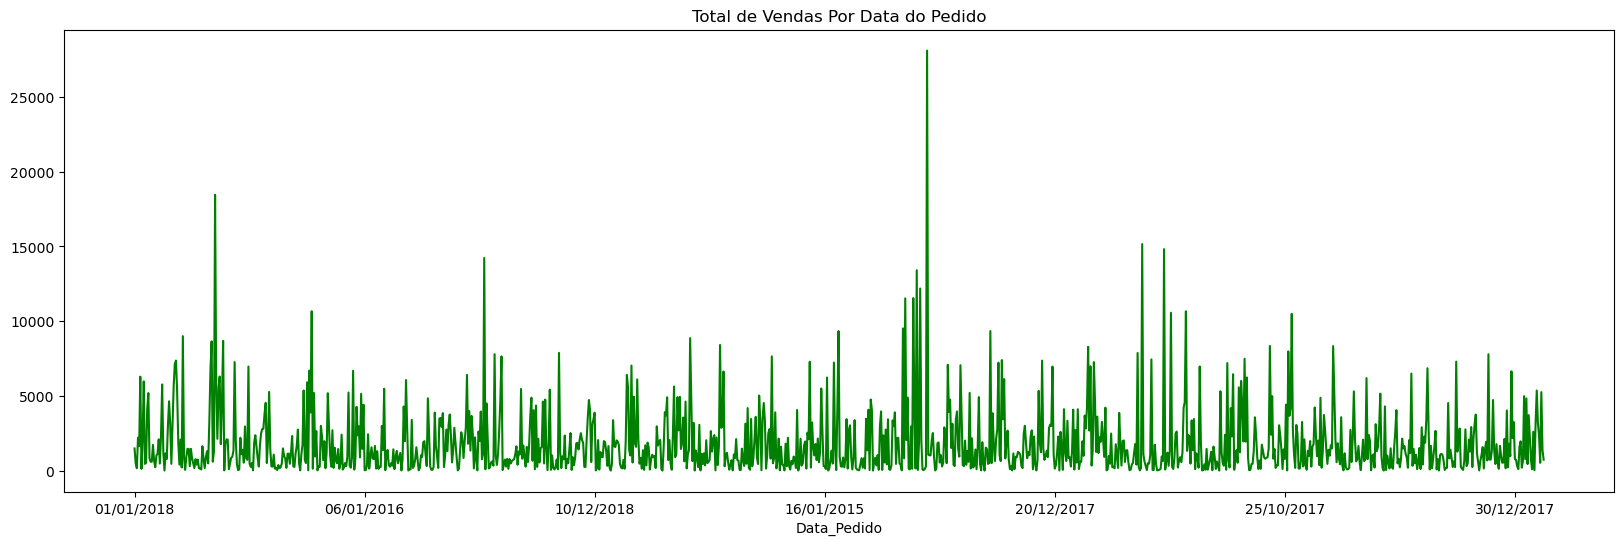

In [371]:
# Plot
plt.figure(figsize = (20, 6))
ds.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

### Pergunta de Negócio 3:

#### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [392]:
# Calculamos o total de vendas para cada data de pedido
ds = ds.groupby('Estado')['Valor_Venda'].sum()

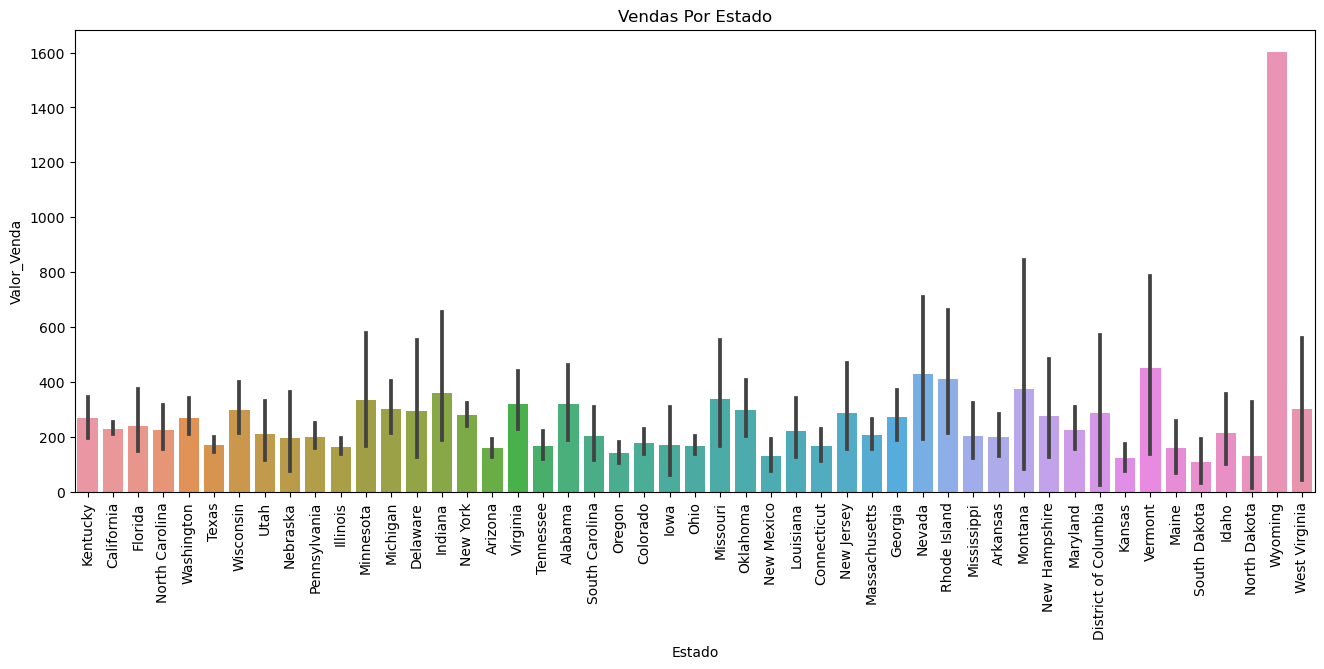

In [401]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = ds, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 90)
plt.show()

### Pergunta de Negócio 4:
##### Quais São as 10 Cidades com Maior Total de Vendas?¶
Demonstre o resultado através de um gráfico de barras.

In [460]:
# Calculamos o total de vendas para cada data de pedido
ds1= ds.groupby('Cidade')['Valor_Venda'].sum().reset_index()
ds1 = ds1.sort_values(by='Valor_Venda', ascending=False).head(10)

In [461]:
ds1.head (10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


Text(0, 0.5, 'Total de Vendas')

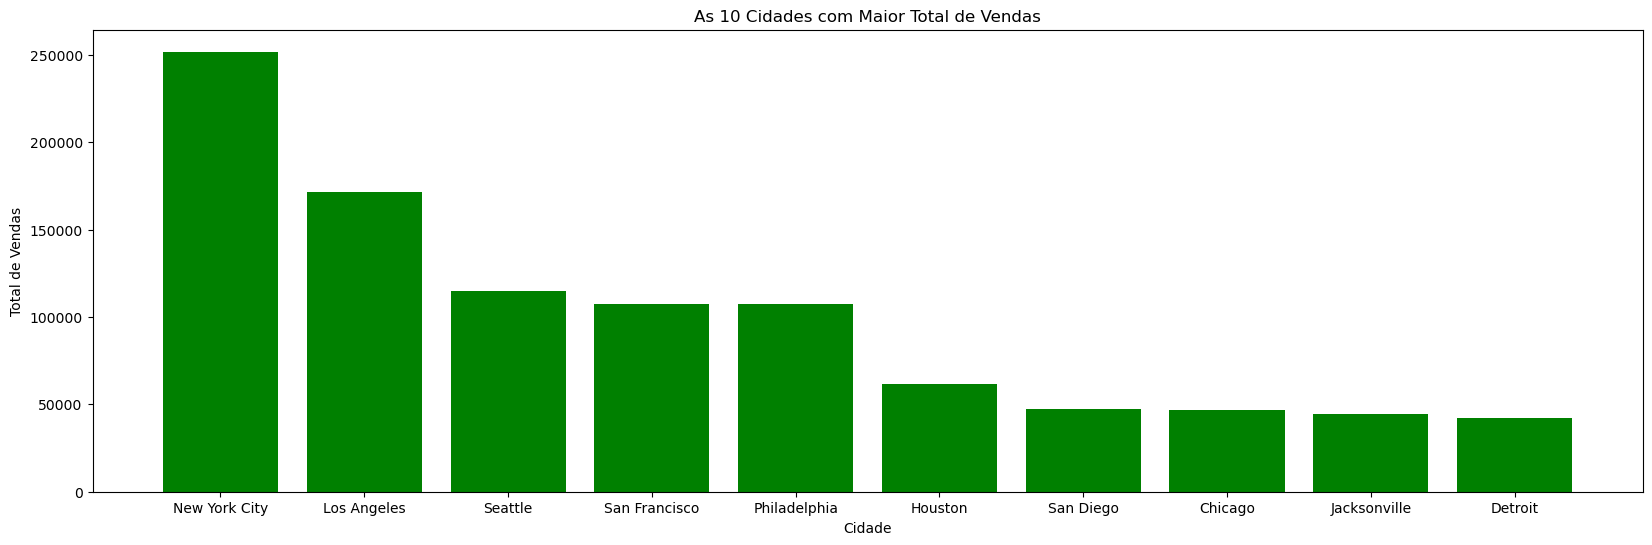

In [470]:
plt.figure(figsize=(20, 6))
plt.bar(ds1['Cidade'], ds1['Valor_Venda'], color='g')
plt.title('As 10 Cidades com Maior Total de Vendas')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

### Pergunta de Negócio 5:
#### Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.

In [492]:
# Calculamos o total de vendas para cada data de pedido
ds2 = ds.groupby('Segmento')['Valor_Venda'].sum ().reset_index()
ds2 = ds2.sort_values(by='Valor_Venda', ascending=False).head(3)

In [493]:
ds2.head (3)

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [502]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

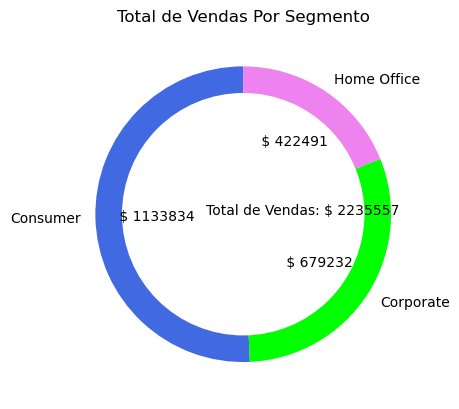

In [513]:
cores = ['Royalblue' ,'lime' , 'violet']

# Gráfico de pizza
plt.pie(ds2 ['Valor_Venda'], 
        labels = ds2 ['Segmento'],
        autopct = autopct_format(ds2['Valor_Venda']), colors = cores,
        startangle = 90)


# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(ds2 ['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

### Pergunta de Negócio 6 (Desafio Nível Baby):
##### Qual o Total de Vendas Por Segmento e Por Ano?

In [545]:
ds ['Data_Pedido'] = pd.to_datetime(ds ['Data_Pedido'], dayfirst = True)

In [540]:
ds.head()

,Ano,Valor_Venda
0,2015,470768.6001
1,2016,454072.5154
2,2017,595365.9240
3,2018,715350.9152


In [549]:
ds3 = ds.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [550]:
# Extraímos o ano criando nova variável
ds['Ano'] = ds['Data_Pedido'].dt.year

In [551]:
print (ds3)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64


### Pergunta de Negócio 7 (Desafio Nível Júnior):
##### Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

 Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

 Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?

In [688]:
# Cria uma nova coluna de acordo com a regra definida acima
ds ['Desconto'] = numpy.where(ds['Valor_Venda'] > 1000, 0.15, 0.10)

In [689]:
# Total por cada valor da variável
ds ['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

### Pergunta de Negócio 8 (Desafio Nível Master):

##### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [690]:
ds.head ()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,6,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016,0.1


In [691]:
ds ['Valor_Desconto'] = ds ['Valor_Venda'] - ds ['Valor_Venda'] * ds ['Desconto']

In [692]:
ds.head ()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano,Desconto,Valor_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,6,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016,0.1,20.13120


In [699]:
# Filtrando as vendas antes do desconto de 15%
ds_antes_desconto = ds.loc[ds['Desconto'] == 0.15, 'Valor_Venda']

In [700]:
# Filtrando as vendas depois do desconto de 15%
ds_depois_desconto = ds.loc[ds ['Desconto'] == 0.15, 'Desconto']

In [701]:
# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = ds_antes_desconto.mean()

In [703]:
# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = ds_depois_desconto.mean()

In [704]:
print("Média das vendas antes do desconto de 15%:", round(media_vendas_antes_desconto, 2))

Média das vendas antes do desconto de 15%: 2116.81


In [705]:
print("Média das vendas depois do desconto de 15%:", round(media_vendas_depois_desconto, 2))

Média das vendas depois do desconto de 15%: 0.15


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [706]:
# Extraímos o mês e gravamos em uma nova variável
ds ['Mes'] = ds ['Data_Pedido'].dt.month

In [708]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
ds3 = ds.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([numpy.sum, numpy.mean, numpy.median])

<Figure size 1200x600 with 0 Axes>

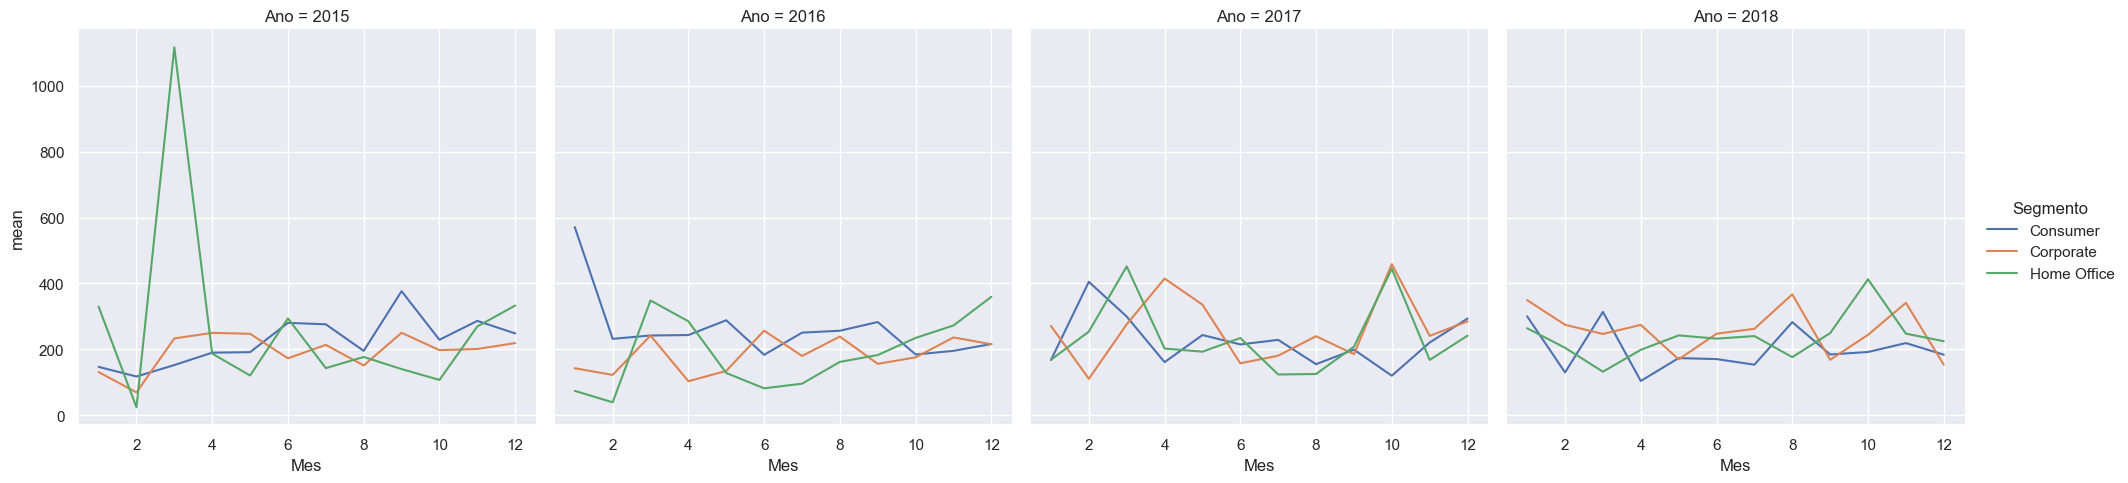

In [709]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = ds3, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [711]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
ds4 = ds.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [712]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
ds4 = ds4[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [713]:
# Criamos outro dataframe somente com os totais por categoria
ds4_cat = ds4.groupby('Categoria').sum(numeric_only = True).reset_index()

In [714]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [715]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

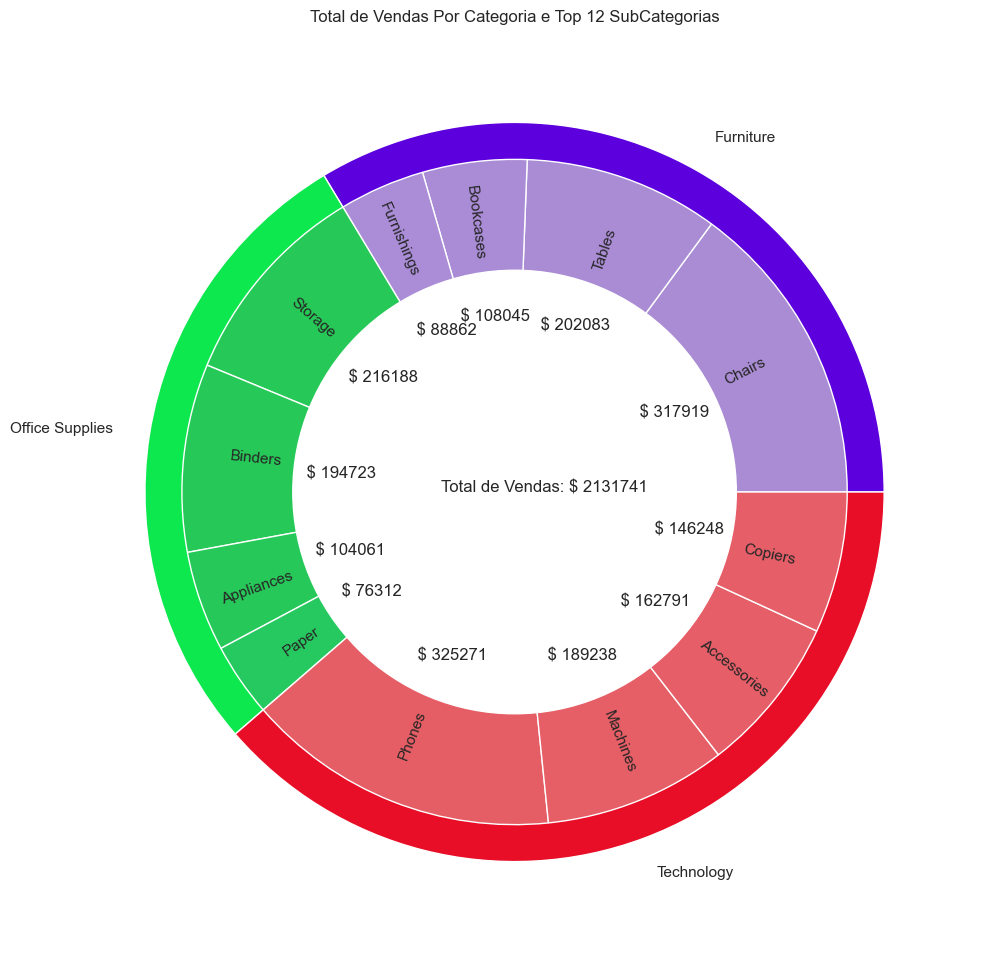

In [716]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(ds4_cat['Valor_Venda'], 
            radius = 1,
            labels = ds4_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(ds4['Valor_Venda'],
            radius = 0.9,
            labels = ds4['SubCategoria'],
            autopct = autopct_format(ds4['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(ds4['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()